In [18]:
#Importing all
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
import scipy
import os
import skimage as ski
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import img_as_float
from skimage import exposure
from PIL import Image

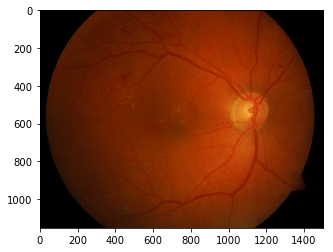

In [19]:
orig_image = io.imread('E:\Jupyter Notebooks\CI\diaretdb1_image003.png') #Pop an image from the shared image stack
orig_image.shape #Finding the shape of the image
plt.imshow(orig_image)
plt.show() #display the current figure

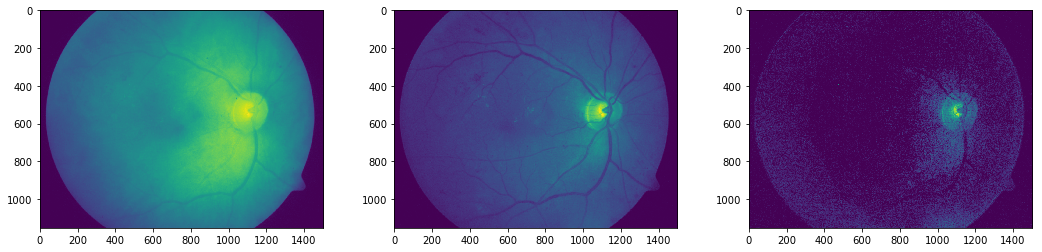

In [20]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
for i in range(3):
    ax[i].imshow(orig_image[:,:,i])#, cmap=plt.cm.gray)
plt.show() #display the current figure

### Gray Scale

(1152L, 1500L)


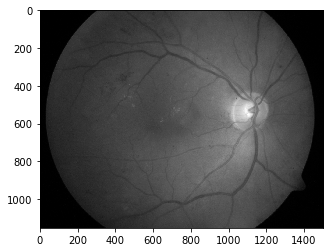

In [21]:
image = rgb2gray(orig_image) #an RGB representation of a gray-level 
print image.shape

plt.imshow(image, cmap=plt.cm.gray) # colormap is to find a good representation in 3D 
plt.show() #display the current figure

### Re-Size

(127L, 192L)


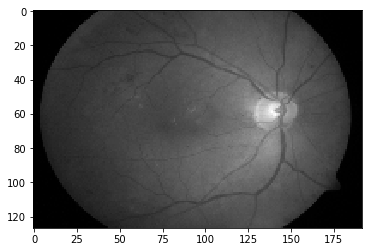

In [22]:
output_shape = (254/2, 384/2)
image2 = resize(image, output_shape) #Resize the image
print image2.shape

plt.imshow(image2, cmap=plt.cm.gray)
plt.show()

### Histogram Equalization

C:\Users\urvas\Anaconda2\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


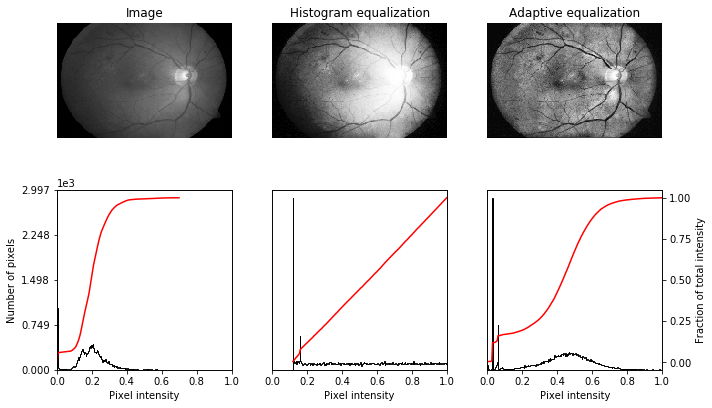

In [23]:
def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

# Equalization
img_eq = exposure.equalize_hist(image2)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(image2, clip_limit=0.03)

# Display results
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(image2, axes[:, 0])
ax_img.set_title('Image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 1])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 2])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

plt.tight_layout()
plt.show()

(127L, 192L)


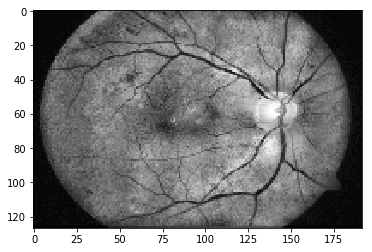

In [24]:
# Clipping limit, normalized between 0 and 1 (higher values give more contrast).
img_adapteq = exposure.equalize_adapthist(image2, clip_limit=0.03)
print img_adapteq.shape

plt.imshow(img_adapteq, cmap=plt.cm.gray)
plt.show()